In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

dataset_churn = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
)

C:\Users\jmalp\AppData\Local\Temp\ipykernel_18972\2443853768.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  dataset_churn = kagglehub.load_dataset(


In [75]:
import pandas as pd

dataset_churn.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
dataset_churn['TotalCharges'] = pd.to_numeric(dataset_churn['TotalCharges'], errors='coerce')

In [58]:
dataset_churn=dataset_churn.dropna(subset=['TotalCharges'])

In [76]:
print(dataset_churn["Churn"].value_counts())
print(dataset_churn["Churn"].value_counts(normalize=1)*100)

Churn
No     5163
Yes    1869
Name: count, dtype: int64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


# Primero analizamos los campos categoricos

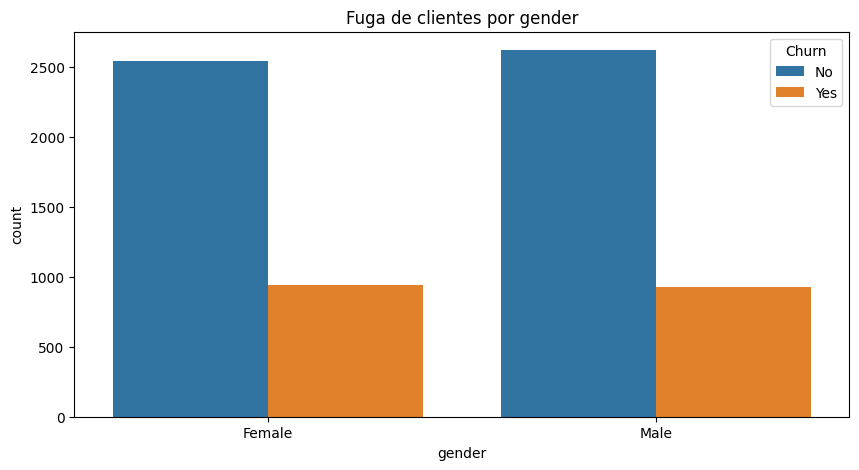

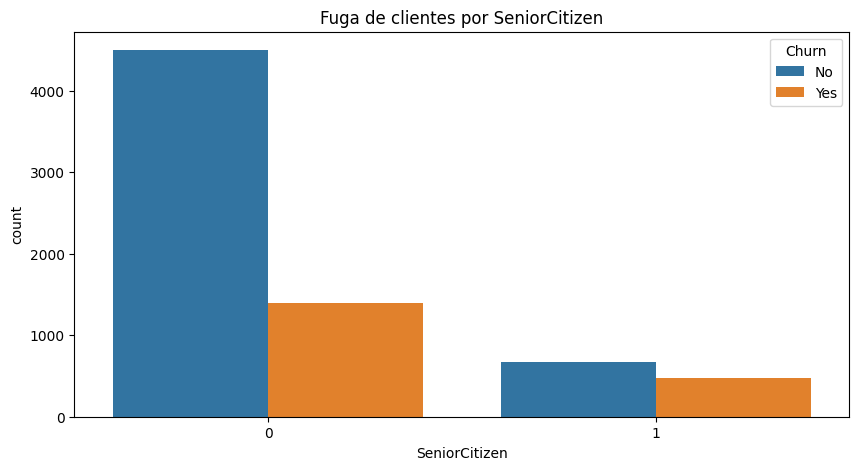

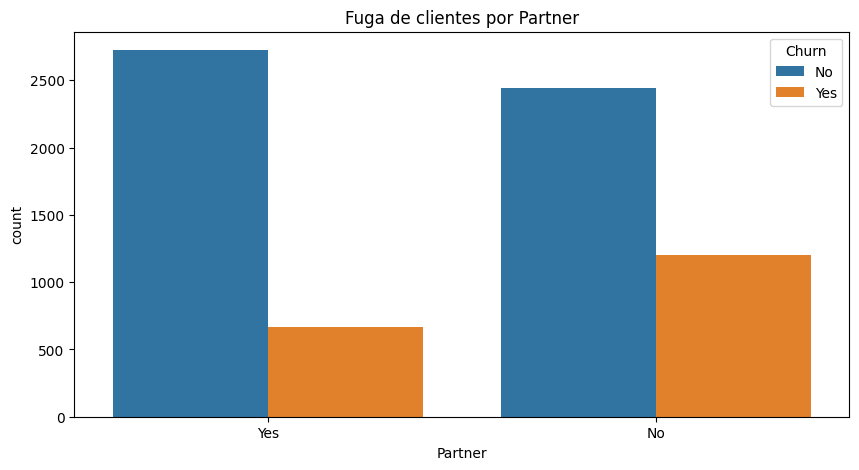

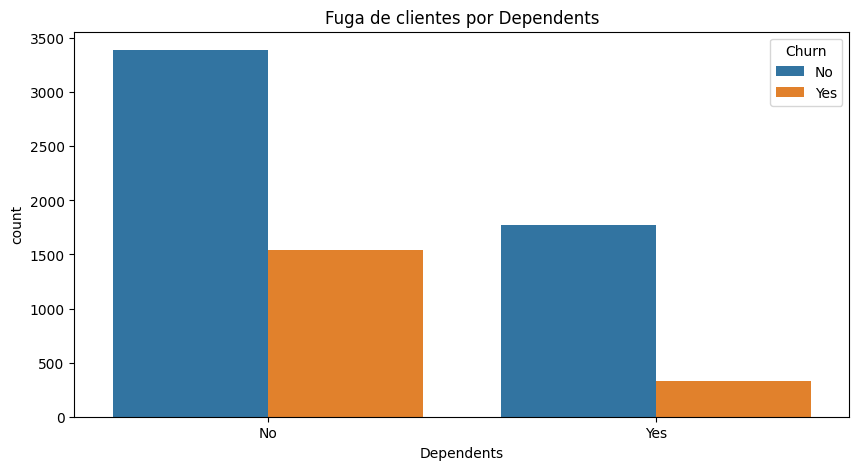

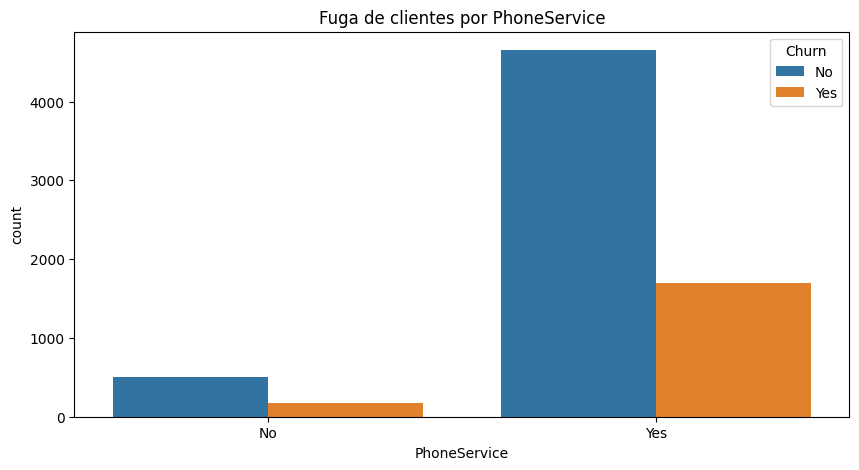

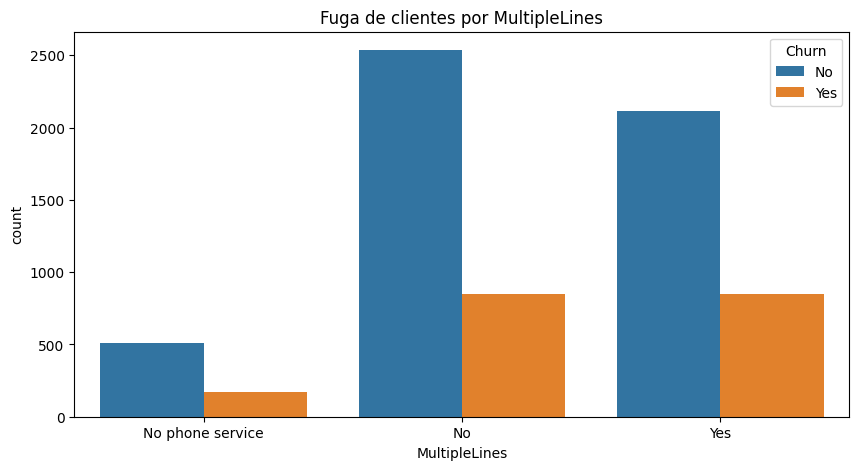

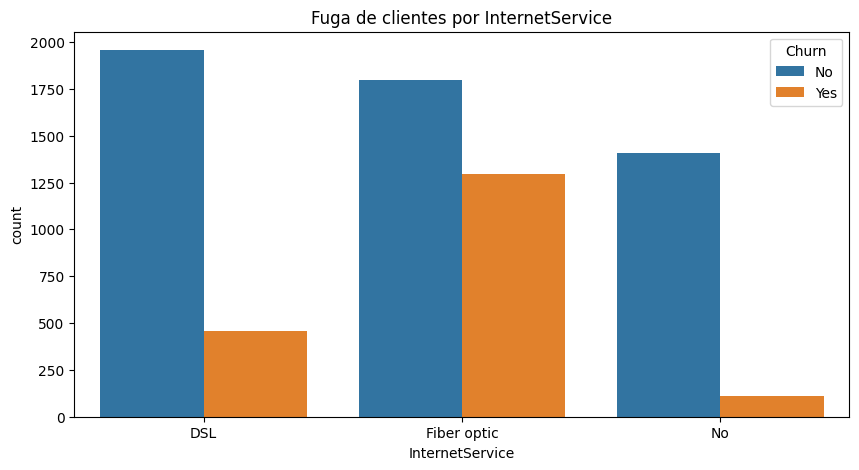

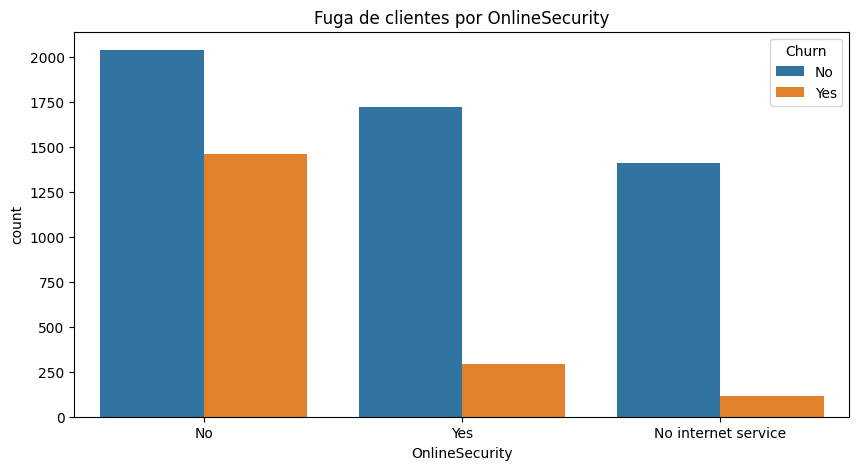

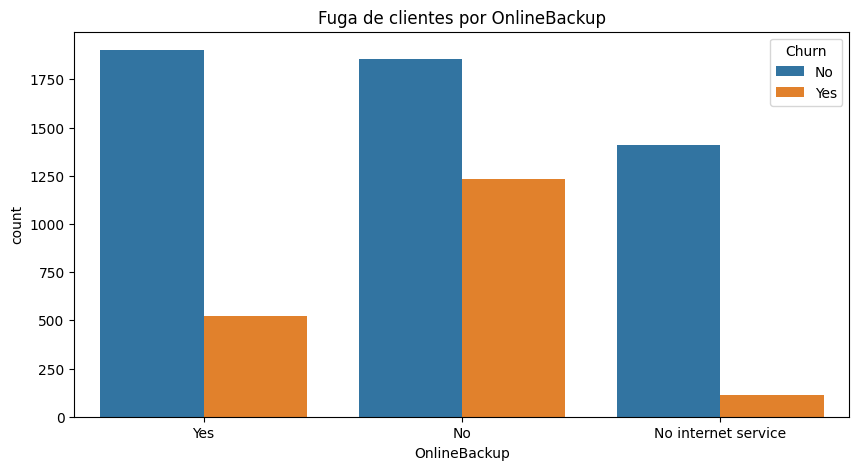

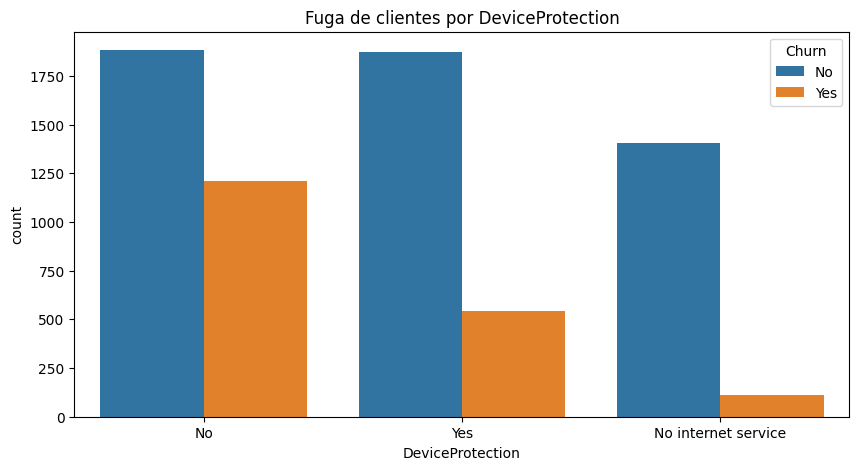

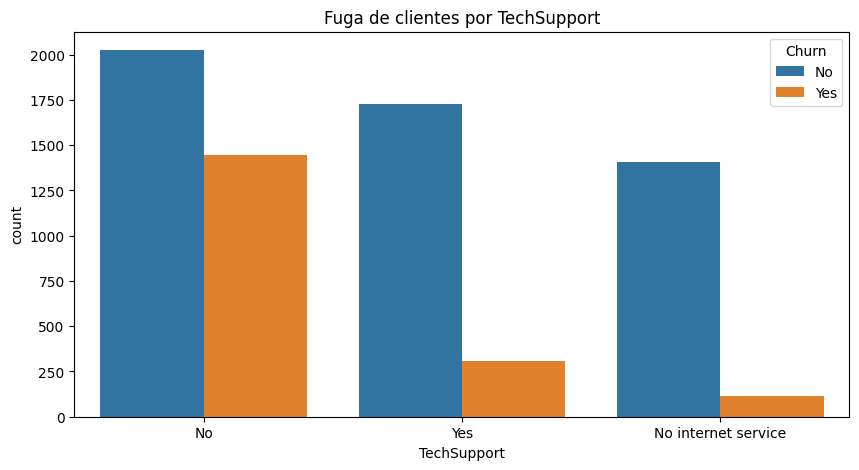

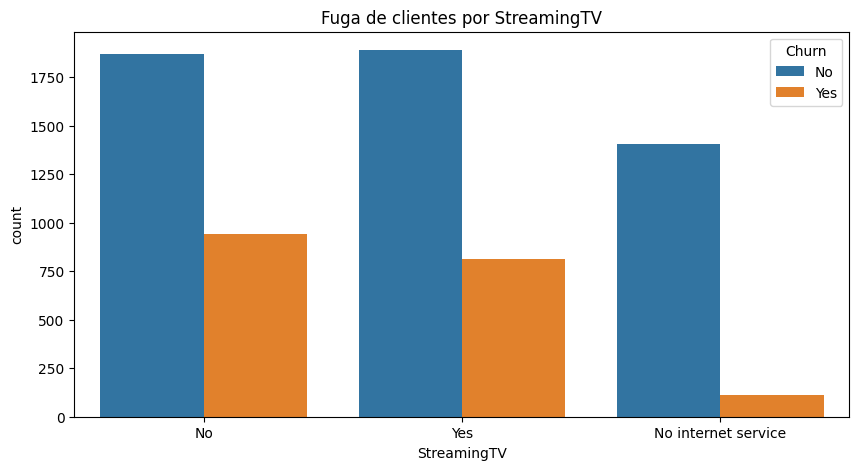

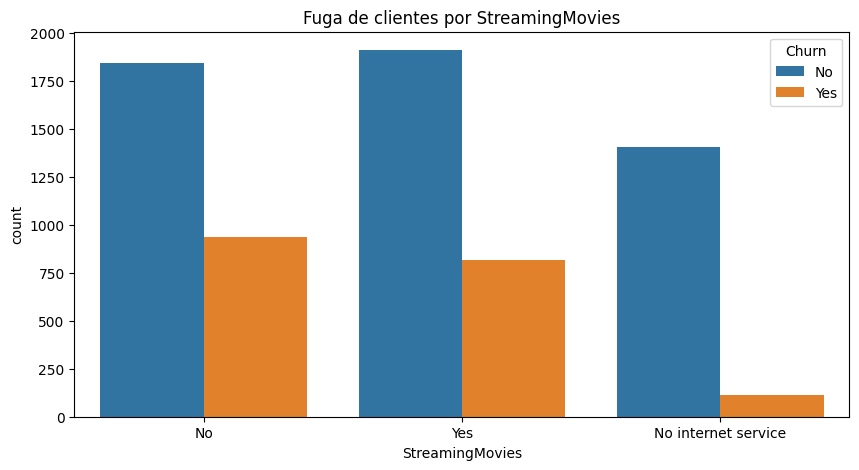

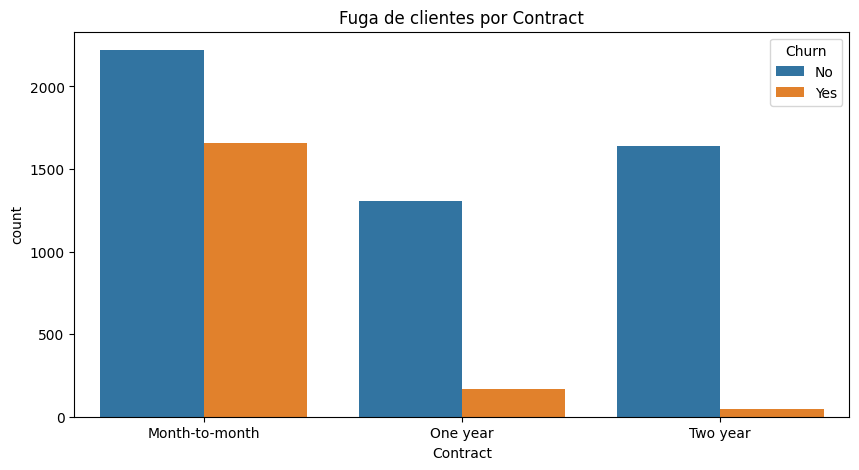

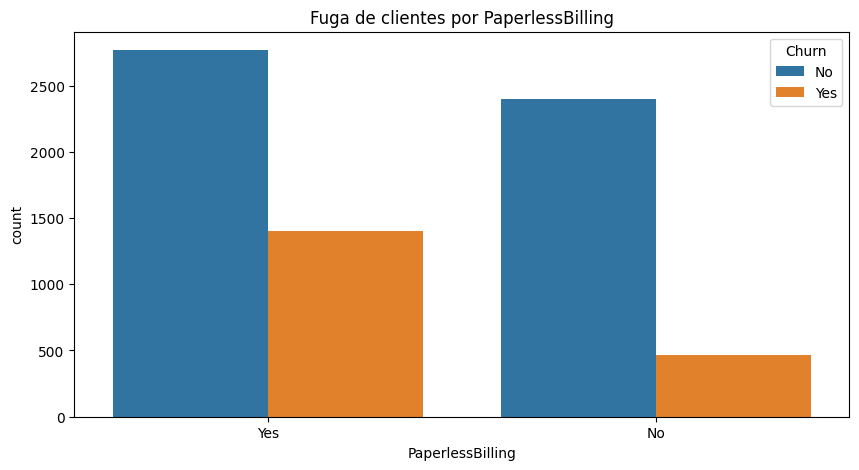

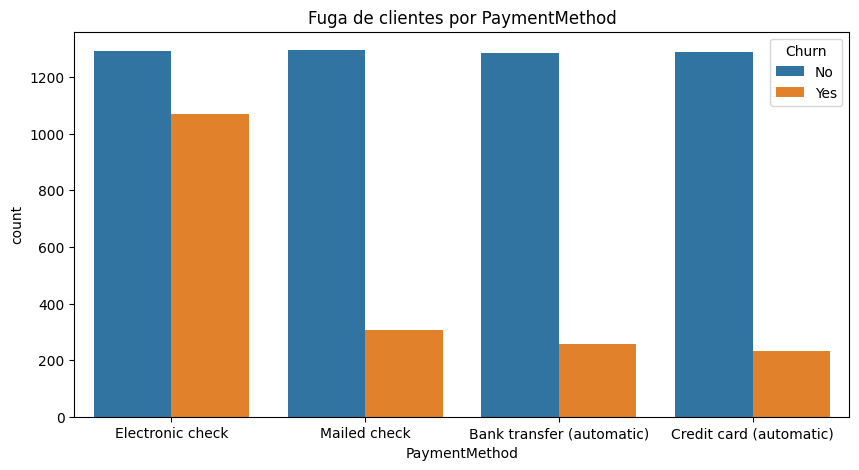

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
           "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract",
           "PaperlessBilling","PaymentMethod"]


for a in columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=a, hue='Churn', data=dataset_churn)
    plt.title(f'Fuga de clientes por {a}')
    plt.show()
    


### Ya obesrvamos que algunos campos tienen cierta correcionalidad con el campo churn, asi que lo demostraremos estadisticamente usando la prueba chi2 con un valor de significancia del 5% entre cada campo categorico y el campo churn

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tu lista de columnas
columns = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines","InternetService",
           "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
           "Contract","PaperlessBilling","PaymentMethod"]

# Lista para guardar los resultados
resultados = []

for col in columns:
    # 1. Crear la tabla de contingencia (frecuencias observadas)
    contingency_table = pd.crosstab(dataset_churn[col], dataset_churn['Churn'])
    
    # 2. Aplicar la prueba Chi-cuadrado
    # chi2: estadístico, p: valor p, dof: grados de libertad, expected: frecuencias esperadas
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # 3. Determinar si es significante (p < 0.05)
    es_significante = "Sí" if p < 0.05 else "No"
    
    # Guardar en la lista
    resultados.append({
        'Variable': col,
        'Chi2': round(chi2, 4),
        'Valor p': round(p, 4),
        'Significante (5%)': es_significante
    })

# 4. Convertir resultados a un nuevo DataFrame para mejor visualización
df_resultados = pd.DataFrame(resultados)

# Mostrar variables significativas primero
print(df_resultados.sort_values(by='Chi2',ascending=False))

            Variable       Chi2  Valor p Significante (5%)
13          Contract  1179.5458   0.0000                Sí
7     OnlineSecurity   846.6774   0.0000                Sí
10       TechSupport   824.9256   0.0000                Sí
6    InternetService   728.6956   0.0000                Sí
15     PaymentMethod   645.4299   0.0000                Sí
8       OnlineBackup   599.1752   0.0000                Sí
9   DeviceProtection   555.8803   0.0000                Sí
12   StreamingMovies   374.2684   0.0000                Sí
11       StreamingTV   372.4565   0.0000                Sí
14  PaperlessBilling   256.8749   0.0000                Sí
3         Dependents   186.3216   0.0000                Sí
1      SeniorCitizen   158.4408   0.0000                Sí
2            Partner   157.5032   0.0000                Sí
5      MultipleLines    11.2715   0.0036                Sí
4       PhoneService     0.8737   0.3499                No
0             gender     0.4755   0.4905                

### Como podemos observar 14 de los 16 campos categoricos presentan una relacion significa con el campo churn

# Ahora veremos los campos numericos

C:\Users\jmalp\AppData\Local\Temp\ipykernel_18972\2640576119.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset_churn, x=col, hue='Churn', shade=True, palette='magma')


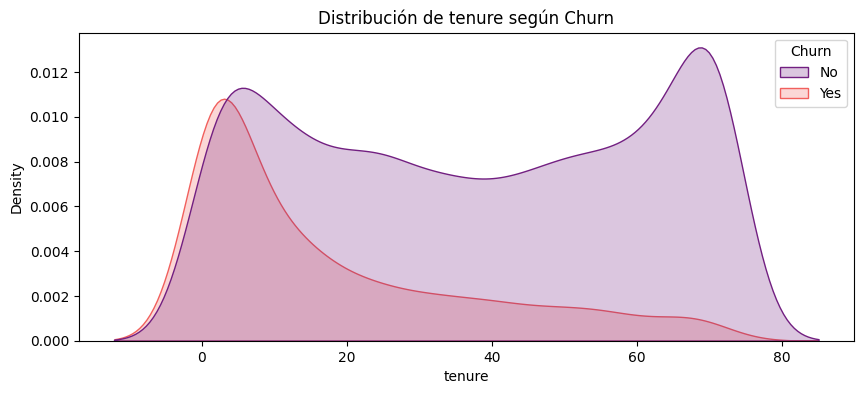

C:\Users\jmalp\AppData\Local\Temp\ipykernel_18972\2640576119.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset_churn, x=col, hue='Churn', shade=True, palette='magma')


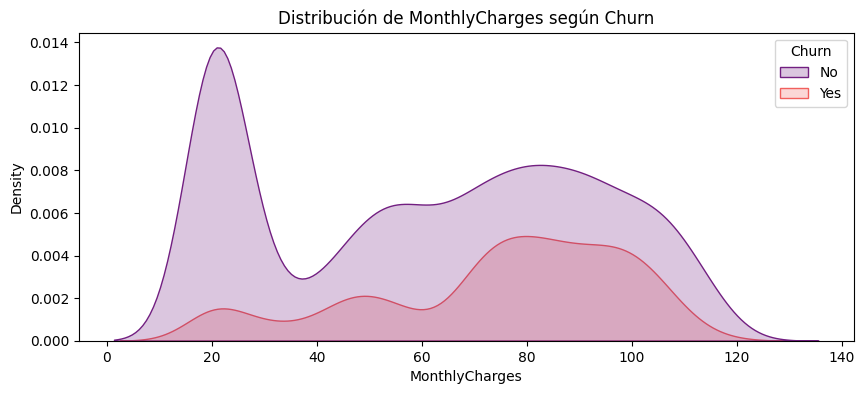

C:\Users\jmalp\AppData\Local\Temp\ipykernel_18972\2640576119.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=dataset_churn, x=col, hue='Churn', shade=True, palette='magma')


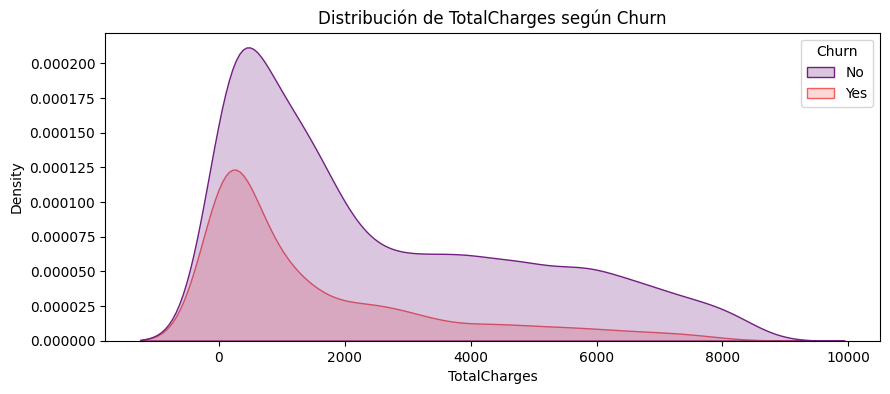

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    # El KDE Plot muestra la "densidad" o forma de la distribución
    sns.kdeplot(data=dataset_churn, x=col, hue='Churn', shade=True, palette='magma')
    plt.title(f'Distribución de {col} según Churn')
    plt.show()

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    group_yes = dataset_churn[dataset_churn['Churn'] == 'Yes'][col].dropna()
    group_no = dataset_churn[dataset_churn['Churn'] == 'No'][col].dropna()
    
    t_stat, p_val = ttest_ind(group_yes, group_no)
    
    print(f"Variable: {col}")
    print(f"P-valor: {p_val:.4f}")
    if p_val < 0.05:
        print("Resultado: Significativa \n")
    else:
        print("Resultado: No significativa\n")


Variable: tenure
P-valor: 0.0000
Resultado: Significativa 

Variable: MonthlyCharges
P-valor: 0.0000
Resultado: Significativa 

Variable: TotalCharges
P-valor: 0.0000
Resultado: Significativa 



### Como podemos observar los 3 campos numericos influyen con el churn, con más relevancia con los usiarios recien inscritos. Entonces consideramos estos 3 campos.

## Resumiendo, para hacer un modelo predictivo de churn usaremos 14 variables.
## Para este trabajo, compararemos 3 modelos, RamdomForest, XGBoost y una Red Neuronal. Importante recalacar que daremos peso a la clase 1(yes) ya que respresenta una menor parte del total de usuarios.

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# 1. Definir tus columnas
cat_cols =[
    "Contract", "OnlineSecurity", "TechSupport", "InternetService", 
    "PaymentMethod", "OnlineBackup", "DeviceProtection", "StreamingMovies", 
    "StreamingTV", "PaperlessBilling", "Dependents", "SeniorCitizen", 
    "Partner", "MultipleLines"
]
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 2. Configurar el pre-procesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# 3. Crear el Pipeline (une el pre-procesamiento con el modelo)
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Crea datos sintéticos de 'Yes'
    ('classifier', RandomForestClassifier(random_state=42))
])

# 4. Dividir datos (X = variables, y = objetivo 'Churn')
X = dataset_churn[cat_cols + num_cols]
y = dataset_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convertir target a 0 y 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Proporción en datos originales:\n", y.value_counts(normalize=True))
print("\nProporción en entrenamiento (train):\n", y_train.value_counts(normalize=True))
print("\nProporción en prueba (test):\n", y_test.value_counts(normalize=True))


Proporción en datos originales:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Proporción en entrenamiento (train):
 Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Proporción en prueba (test):
 Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


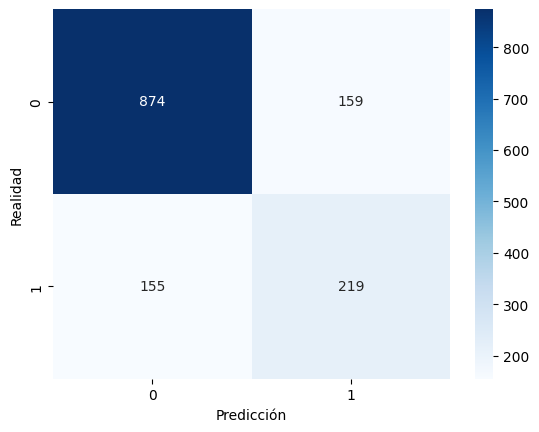

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1033
           1       0.58      0.59      0.58       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



In [181]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 5. Entrenar el modelo

model.fit(X_train, y_train)

# 6. Evaluar

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Ver la matriz
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print(classification_report(y_test, y_pred))

In [182]:
from xgboost import XGBClassifier

# 1. Definir tus columnas
cat_cols =[
    "Contract", "OnlineSecurity", "TechSupport", "InternetService", 
    "PaymentMethod", "OnlineBackup", "DeviceProtection", "StreamingMovies", 
    "StreamingTV", "PaperlessBilling", "Dependents", "SeniorCitizen", 
    "Partner", "MultipleLines"
] 
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 2. Configurar el pre-procesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

# 3. Crear el Pipeline (une el pre-procesamiento con el modelo)
model = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)), # Crea datos sintéticos de 'Yes'
    ('classifier',XGBClassifier(scale_pos_weight=3, random_state=42))
])

# 4. Dividir datos (X = variables, y = objetivo 'Churn')
X = dataset_churn[cat_cols + num_cols]
y = dataset_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Convertir target a 0 y 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)
print("Proporción en datos originales:\n", y.value_counts(normalize=True))
print("\nProporción en entrenamiento (train):\n", y_train.value_counts(normalize=True))
print("\nProporción en prueba (test):\n", y_test.value_counts(normalize=True))

Proporción en datos originales:
 Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Proporción en entrenamiento (train):
 Churn
0    0.734222
1    0.265778
Name: proportion, dtype: float64

Proporción en prueba (test):
 Churn
0    0.734186
1    0.265814
Name: proportion, dtype: float64


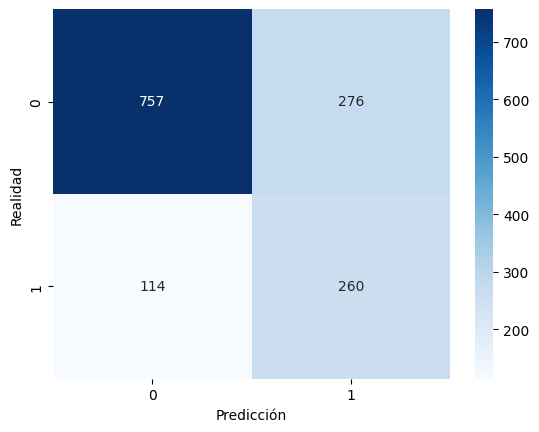

              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1033
           1       0.49      0.70      0.57       374

    accuracy                           0.72      1407
   macro avg       0.68      0.71      0.68      1407
weighted avg       0.77      0.72      0.74      1407



In [183]:
# 5. Entrenar el modelo

model.fit(X_train, y_train)

# 6. Evaluar

y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Ver la matriz
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

print(classification_report(y_test, y_pred))

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Preprocesamiento y Selección de Modelos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# Librerías de Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report

# 1. CARGA Y LIMPIEZA DE DATOS
# Convertimos TotalCharges a numérico y manejamos los espacios en blanco
dataset_churn['TotalCharges'] = pd.to_numeric(dataset_churn['TotalCharges'], errors='coerce')
# Rellenamos los nulos con la mediana para no perder filas
dataset_churn['TotalCharges'] = dataset_churn['TotalCharges'].fillna(dataset_churn['TotalCharges'].median())

# 2. SELECCIÓN DE VARIABLES (Tus 14 significativas + 3 numéricas)
cat_features = [
    "Contract", "OnlineSecurity", "TechSupport", "InternetService", 
    "PaymentMethod", "OnlineBackup", "DeviceProtection", "StreamingMovies", 
    "StreamingTV", "PaperlessBilling", "Dependents", "SeniorCitizen", 
    "Partner", "MultipleLines"
]
num_features = ["tenure", "MonthlyCharges", "TotalCharges"]

X = dataset_churn[cat_features + num_features]
y = dataset_churn['Churn'].map({'Yes': 1, 'No': 0}).values

# 3. DIVISIÓN DE DATOS (Train/Test)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. PREPROCESAMIENTO (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features) # drop='first' evita la trampa de variables ficticias
    ])

# Transformamos los datos
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# 5. CÁLCULO DE PESOS DE CLASE (Balanceo)
pesos = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: pesos[0], 1: pesos[1]}
print(f"Pesos aplicados para equilibrar las clases: {class_weight_dict}")

# 6. ARQUITECTURA DE LA RED NEURONAL
model = tf.keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(), # Ayuda a que la red aprenda mejor los números escalados
    layers.Dropout(0.2),         # Evita el sobreajuste (overfitting)
    
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.1),
    
    layers.Dense(1, activation='sigmoid') # Sigmoid para darnos una probabilidad entre 0 y 1
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Pesos aplicados para equilibrar las clases: {0: np.float64(0.6809927360774818), 1: np.float64(1.8812709030100334)}


C:\Users\jmalp\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [190]:
# 7. ENTRENAMIENTO
# Usamos EarlyStopping para detenernos si el modelo deja de mejorar
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weight_dict, # Aquí aplicamos los pesos calculados
    callbacks=[callback],
    verbose=1
)

Epoch 1/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6304 - loss: 0.6100 - val_accuracy: 0.7751 - val_loss: 0.5140
Epoch 2/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7224 - loss: 0.5437 - val_accuracy: 0.7653 - val_loss: 0.4893
Epoch 3/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7311 - loss: 0.5146 - val_accuracy: 0.7716 - val_loss: 0.4745
Epoch 4/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7384 - loss: 0.5089 - val_accuracy: 0.7662 - val_loss: 0.4710
Epoch 5/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7433 - loss: 0.5054 - val_accuracy: 0.7698 - val_loss: 0.4658
Epoch 6/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7438 - loss: 0.5046 - val_accuracy: 0.7689 - val_loss: 0.4686
Epoch 7/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7484 - loss: 0.4946 - val_accuracy: 0.7724 - val_loss: 0.4693
Epoch 8/50
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7478 - loss: 0.4940 - val_accuracy: 0.

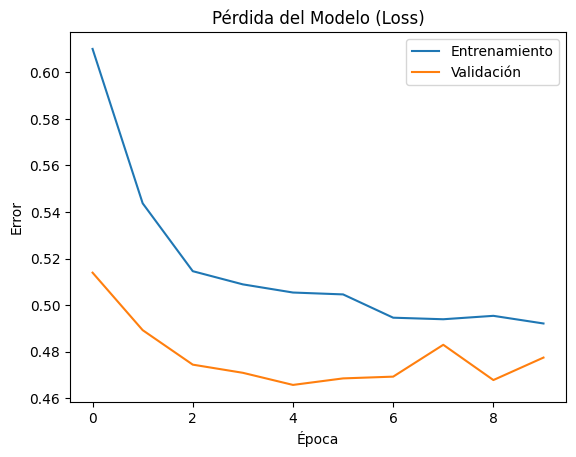

In [191]:
import matplotlib.pyplot as plt

# Graficar la pérdida
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo (Loss)')
plt.xlabel('Época')
plt.ylabel('Error')
plt.legend()
plt.show()

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


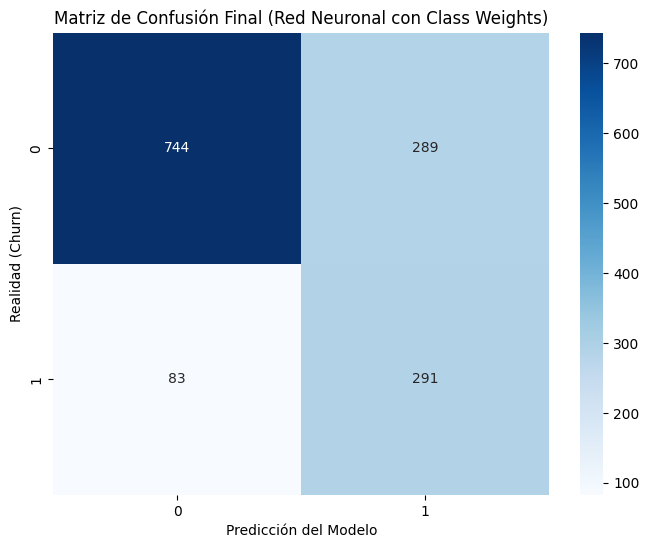


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1033
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.79      0.74      0.75      1407



In [192]:
# 8. EVALUACIÓN Y MATRIZ DE CONFUSIÓN
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

# Visualización de la Matriz de Confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión Final (Red Neuronal con Class Weights)')
plt.xlabel('Predicción del Modelo')
plt.ylabel('Realidad (Churn)')
plt.show()

# Métricas detalladas
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

### Como se puede observar, los 3 modelos tuvieron un buen rendimiento al superar el 70% de accuracy, pero, hay que analizar bien los valores de recall y precision de cada uno resaltando puntos importantes:
### 1º: La red neuronal se mostro el más eficaz para capturar a los desertores, a costa de una mayor tasa de falsos positivos.
### 2º: XGBoost y RamdomForest precestan un equilibrio, teniendo una detección no tan eficaz como la de la red neuronal pero teniendo un mejor trabajo en la detección de no-desertores
### En conclusión, para una estrategia de retención de subcritos donde el costo de mantener a un cliente es superior al de una campaña de fidelización, la Red Neuronal es la mejor opción.